In [1]:
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt
import math

#### (1) ELEMENTS OF DETECTION THEORY

### Exercice 1

X ~ N(0,1)  
Y ~ N(0,3) 

In [2]:
x_mu = 0
x_sigma = 1
y_mu = 0
y_sigma = 3
print("P[-2 < Y <= 1] = ",norm.cdf(1,y_mu,y_sigma) - norm.cdf(-2,y_mu,y_sigma))
print("P[Y > 5.5]     = ",norm.sf(5.5,y_mu,y_sigma))
print("P[-2 < X <= 2] = ",norm.cdf(2,x_mu,x_sigma) - norm.cdf(-2,x_mu,x_sigma))
print("P[X > 1.5]     = ",norm.sf(1.5,x_mu,x_sigma))

P[-2 < Y <= 1] =  0.3780661222713134
P[Y > 5.5]     =  0.03337650758481726
P[-2 < X <= 2] =  0.9544997361036416
P[X > 1.5]     =  0.06680720126885807


### Exercice 2

X ~ N(27,9)

In [3]:
x_mu = 27
x_sigma = 9
print("P[X > 35]       = ",norm.sf(35,x_mu,x_sigma))
print("P[X <= 5]       = ",1-norm.sf(5,x_mu,x_sigma))
print("P[20 < X <= 40] = ",norm.cdf(40,x_mu,x_sigma) - norm.cdf(20,x_mu,x_sigma))

P[X > 35]       =  0.18703139874544122
P[X <= 5]       =  0.007253771124867803
P[20 < X <= 40] =  0.7073429864110152


### Exercice 3

$E[X] = 0, P[|X| <= 10] = P[-10 < X \leq 10] = 0.3$  
lets set : X ~ N(0, $\sigma_{x}$), N = X/$\sigma_{x}$  
  
we can then rewerite as : 
$P[-10/\sigma_{x} < X \leq 10/\sigma_{x}] = 0.3 = \phi(10/\sigma_{x}) - \phi(-10/\sigma_{x}) = \phi(10/\sigma_{x}) - (1 - \phi(10/\sigma_{x})) = 2*\phi(10/\sigma_{x}) - 1$  
  
$\phi(10/\sigma_{x}) = 1.3/2 = 0.65$  
  
And,  
$\sigma_{x} = 10/\phi^{-1}(0.65)$



In [4]:
print("sigma_x = ", 10 / norm.ppf(1.3/2))

sigma_x =  25.95242368834525


### Exercice 4

as defined:  
$Q(n) = \frac{1}{\sqrt{2 \pi}} * \int_{n}^{\infty} e^{\frac{-u^2}{2}} du$  
lets set: $x = \frac{u}{\sqrt{2}}, dx = \frac{du}{\sqrt{2}}$  
  
$Q(n) = \frac{1}{\sqrt{2 n}} * \sqrt{2} * \int_{n}^{\infty} e^{-\frac{(\sqrt{2}\pi)^2}{2}} dx$  
$Q(n) = \frac{1}{\sqrt{n}} * \int_{n}^{\infty} e^{-x^2} dx = \frac{1}{2} erfc(n)$

#### (2) BAYESIAN TWO-CLASS CLASSIFICATION

#### (3) NEYMAN-PEARSON TEST

### Exercice 5


We start with 2 hypotheses:  
$H_0 : X = Z$  
$H_1 : X = \mu_1 + Z$  
with, $Z $~$ N(0,1)$ and $\mu_1 = 1$  
follwing the Map hypothesis to determine $\tau$  
we have $X $~$ N(0,1)$ with hypothesis $H_0$, and $X $~$ N(1,1)$ with hypothesis $H_1$  

$x \in A_{0}, $ if $x \leq \frac{e^{\frac{-x^{2}}{2 \sigma^{2}}}}{e^{\frac{-(x-1)^{2}}{2 \sigma^{2}}}} \geq \frac{P\left[H_{1}\right]}{P\left[H_{0}\right]}$  
$x \in A_{0}, $ if $x \leq \ln \left(\frac{P\left[H_{1}\right]}{P\left[H_{0}\right]}\right)\frac{2 \sigma^{2}+1}{-2}$  
$x \in A_{0},$ if $ x \leq \tau$  
  
To determine the probability of correct detection: $p_d = 1 - P\left(A_0|H_1\right) = 1-\int_{x<\tau} f_{x \mid H_{1}}(x) d x=1-\phi(\tau-1)$




### Exercice 6
from exercice 5: $p_m, p_d$  
$p_m = P[A_0 | H_1] = P [X \leq \tau | H_1] = \phi(\tau - \mu_1) = \phi(-\frac{\sigma^2}{\mu_1} * ln(\frac{1-p}{p}) - \frac{\mu_1}{2})$  
$p_d = 1 - p_m = \phi(\frac{\sigma^2}{\mu_1} * ln(\frac{1-p}{p}) + \frac{\mu_1}{2})$  
$p_f = P[A_1 | H_0] = P[ X > \tau | H_0] = 1 - \phi(\tau) = \phi(\frac{\sigma^2}{\mu_1} * ln(\frac{1-p}{p}) - \frac{\mu_1}{2})$

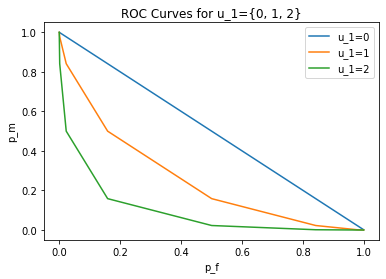

In [5]:
tau_l = list(range(-3,7))
p_f = 1-norm.cdf(tau_l)
u_1 = [0, 1, 2]
l=[]
for u1 in u_1:
    p_m = [norm.cdf(t-u1) for t in tau_l]
    plt.plot(p_f, p_m)
    l.append(f'u_1={u1}')
plt.legend(l)
plt.xlabel('p_f')
plt.ylabel('p_m')
plt.title('ROC Curves for u_1={0, 1, 2}')
plt.show()

### Exercice 7

We start with 2 hypotheses:  
$H_0 : Y = W$  
$H_1 : Y = V + W$  
the binary hypothesis likelihood ratio test will determine the rule that minimises $p_{err}$  
$x \in A_{0}$, if $y \leq \frac{f_{Y \mid H_{0}}}{f_{Y \mid H_{1}}}$  
$x \in A_{0}$, if $y \leq \frac{e^{-y}}{y e^{-y}}$  
$\Rightarrow y \leq \frac{1}{y}$  
$\Rightarrow \tau=1$  
we determine $p_{err}$ for the optimum rule:  
$p_{err} = p_{m} * p\left(H_{1}\right)+p_{f} * p\left(H_{0}\right) = p_{m} * 0.5 + p_{f} * 0.5 <=>$  
$p_{f}=\int_{y>\tau} f_{Y \mid H_{0}}=0.36<=>$  
$p_{m}=\int_{y<\tau} f_{Y \mid H_{1}}=0.26$  
$=>p_{e r r}=0.5 * 0.26+0.5 * 0.36=0.31$





